In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [2]:
train =  pd.read_csv("./data/train.csv")
test =  pd.read_csv("./data/test.csv")
sub =  pd.read_csv("./data/sample_submission.csv")

In [3]:
y=train['income']
test['income']='blank'

In [4]:
### 데이터 합치기
all_dat=pd.concat([train, test], axis=0)
print(all_dat.shape)

(32561, 16)


In [5]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

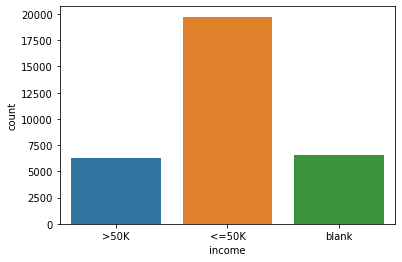

In [6]:
sns.countplot(x='income',data=all_dat)

In [7]:
all_dat.loc[ all_dat['income']=='>50K' , 'target'] = 1
all_dat.loc[ all_dat['income']=='<=50K' , 'target'] = 0
all_dat.loc[ all_dat['income']=='blank' , 'target'] = 999
all_dat['target'] = all_dat.target.astype("int")
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

for i in sel_cat:
    print(all_dat[i].value_counts() )
    print()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

encoder_x = LabelEncoder()
for i in sel_cat:
    temp = i + "_lbl"
    all_dat[temp] = encoder_x.fit_transform(all_dat[i])
    print()

all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,sex_lbl,native_country_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,>50K,1,4,11,2,12,0,4,1,39
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,<=50K,0,4,6,4,7,3,4,1,39
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,<=50K,0,4,15,4,8,3,4,1,39
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,<=50K,0,4,15,4,10,3,4,0,39
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,<=50K,0,4,15,4,1,1,2,0,0


In [10]:
### 라벨 인코딩 되어 원본 피처를 제외
all_dat_n = all_dat.drop(sel_cat, axis=1)
all_dat_n

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,sex_lbl,native_country_lbl
0,0,40,168538,9,0,0,60,>50K,1,4,11,2,12,0,4,1,39
1,1,17,101626,5,0,0,20,<=50K,0,4,6,4,7,3,4,1,39
2,2,18,353358,10,0,0,16,<=50K,0,4,15,4,8,3,4,1,39
3,3,21,151158,10,0,0,25,<=50K,0,4,15,4,10,3,4,0,39
4,4,24,122234,10,0,0,20,<=50K,0,4,15,4,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,61343,13,0,0,40,blank,999,4,9,2,12,0,4,1,39
6508,6508,41,32185,13,0,0,40,blank,999,5,9,2,13,0,4,1,39
6509,6509,39,409189,3,0,0,40,blank,999,4,4,2,8,0,4,1,26
6510,6510,35,180342,9,0,0,40,blank,999,4,11,2,3,0,4,1,39


In [13]:
# income 제외
all_dat_n = all_dat_n.drop(['income'], axis=1)
all_dat_n

KeyError: "['income'] not found in axis"

In [12]:
### 학습용, 테스트 용 나누기
train_n = all_dat_n.loc[ (all_dat_n['target']==0) | (all_dat_n['target']==1)  , : ]
test_n = all_dat_n.loc[ all_dat_n['target']==999  ,  : ]

X = train_n.drop(['target'], axis=1)
y = train_n['target']